In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [72]:
top5df = pd.read_csv('/content/top5.tsv', sep='\t')# read top5.sv to top5df
top5 = ['Diazepam', 'Valium', 'Xanax', 'Alprazolam', 'Lorazepam']# names are from a shell script
WR = [9.7, 9.6, 9.4, 9.3, 9.2]# weighted ratings are hard coded from a shell script output

"""./wr.sh
drugName	weighted_average_rating
Diazepam	9.68618
Valium	9.57957
Xanax	9.36612
Alprazolam	9.31187
Lorazepam	9.24862
etc..
"""
# counts all occurrences of each drugname from top5, reindex accordingly.
reviews = top5df['drugName'].value_counts().reindex(top5).values

# created a new data frame = newtop5df with 3 columns containing values from top5, WR, and reviews
newtop5df = pd.DataFrame({'drugName': top5,'weightedRating': WR, 'reviewCount': reviews})

# weight = mean of reviews for each drugs
avgReviews = newtop5df['reviewCount'].mean()

# mean of WR's, for use in bar graph
wrMean= newtop5df['weightedRating'].mean()
# new rating based on Bayesian formula: favors products with a higher quantity of ratings
newtop5df['bayesianAvg'] = (wrMean * avgReviews + newtop5df['weightedRating'] * newtop5df['reviewCount']) / (avgReviews + newtop5df['reviewCount'])

newtop5df.head()

,drugName,weightedRating,reviewCount,bayesianAvg
0,Diazepam,9.7,68,9.549814
1,Valium,9.6,28,9.477025
2,Xanax,9.4,97,9.419579
3,Alprazolam,9.3,153,9.352927
4,Lorazepam,9.2,119,9.305283


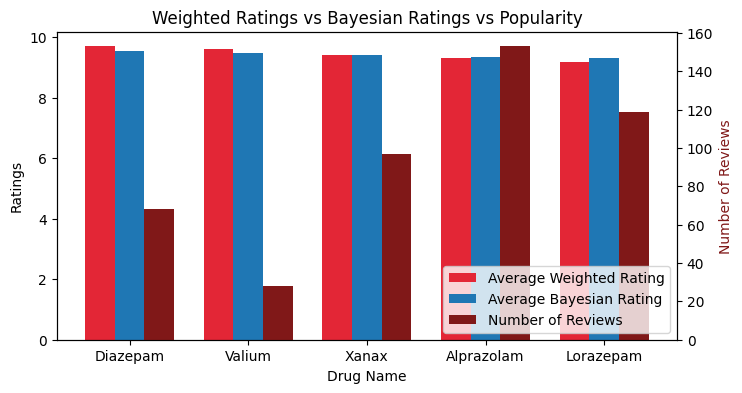

In [58]:
barWidth = .25
# bar positions
range1 = range(len(newtop5df)) # range1 = number of entries in newtop5df
range2 = [x + barWidth for x in range1]# range2&3 = num of entries in newtop5df + barWidth (width of bars)
range3 = [x + barWidth for x in range2]
# ensures that range2&3 are right next to range 1

fig, ax1 = plt.subplots(figsize=(8, 4)) # creates a figure and subplots

# create the Weighted Rating & Bayesian Rating bars.
wrBars = ax1.bar(range1, newtop5df['weightedRating'], color='#E32636', width = barWidth, label='Average Weighted Rating')
bayBars = ax1.bar(range2, newtop5df['bayesianAvg'], color='#1f77b4', width =barWidth, label='Average Bayesian Rating')

ax2 = ax1.twinx()# create twin axis to share the x axis, with a second y axis; make second bar
popularBars = ax2.bar(range3, newtop5df['reviewCount'], color='#801818', width = barWidth, label='Number of Reviews')

# meaningful labels
ax1.set_xlabel('Drug Name')
ax1.set_ylabel('Ratings', color='black')
ax2.set_ylabel('Number of Reviews', color='#801818')# color matched to popularBars
ax1.set_title('Weighted Ratings vs Bayesian Ratings vs Popularity')

# sets x-axis tickmarks to be centered in between bar pairs
ax1.set_xticks([i + barWidth for i in range(len(newtop5df))])
ax1.set_xticklabels(newtop5df['drugName'])# sets labels for the ticks

bars = wrBars+bayBars+popularBars
labels = [bar.get_label() for bar in bars]

#legend
y1line, y1label = ax1.get_legend_handles_labels()
y2line, y2label= ax2.get_legend_handles_labels()
ax2.legend(y1line + y2line, y1label + y2label, loc=4)
plt.show()


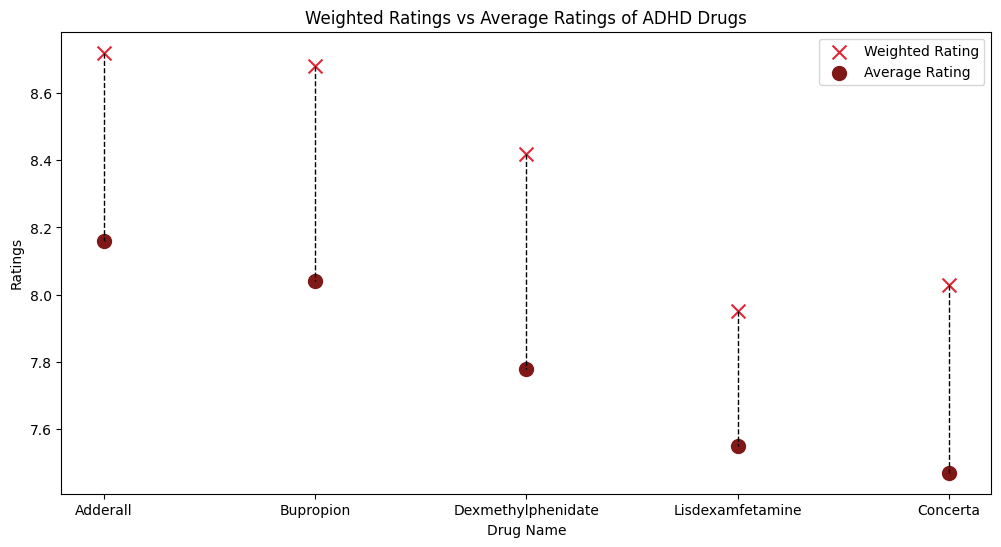

In [68]:
# hard coded the variable values from the output of two separate shell scripts
"""./wr.sh
drugName	weighted_average_rating
Adderall	8.72835
Bupropion	8.68085
Dexmethylphenidate	8.42432
Concerta	8.03767
Lisdexamfetamine	7.95333
etc...   """
# drugname_wr = Weighted Rating
adderall_wr = 8.72
bupropion_wr = 8.68
dexmethylphenidate_wr = 8.42
lisdexamfetamine_wr = 7.95
concerta_wr = 8.03
"""  ./ar.sh
drugName	mean_rating
Adderall	8.16071
Bupropion	8.04
Dexmethylphenidate	7.78788
Lisdexamfetamine	7.55172
Concerta	7.47059. """
# drugname_ ar = Average Rating
adderall_ar = 8.16
bupropion_ar = 8.04
dexmethylphenidate_ar = 7.78
lisdexamfetamine_ar = 7.55
concerta_ar = 7.47

# variables with hard coded names from the same shell script outputs
drugs = ['Adderall', 'Bupropion', 'Dexmethylphenidate', 'Lisdexamfetamine', 'Concerta']
# 2 arrays for WR's and AR's
WRatings = [adderall_wr, bupropion_wr, dexmethylphenidate_wr, lisdexamfetamine_wr, concerta_wr]
ARatings = [adderall_ar, bupropion_ar, dexmethylphenidate_ar, lisdexamfetamine_ar, concerta_ar]


fig, ax = plt.subplots(figsize=(12, 6))# make a scatter plot figure

# plot the weighted ratings , size increased to 100 for visibility, with marker 'x'
ax.scatter(drugs, WRatings, color='#E32636', label='Weighted Rating', s=100, marker='x')

# plot the average ratings
ax.scatter(drugs, ARatings, color='#801818', label='Average Rating', s=100)

for i in range(len(drugs)):# add nice dotted lines between each pair of WR and AR
    ax.plot([drugs[i], drugs[i]], [WRatings[i], ARatings[i]], color = 'black', linestyle='--', linewidth = 1)

# add meaningful labels
ax.set_xlabel('Drug Name')
ax.set_ylabel('Ratings')
ax.set_title('Weighted Ratings vs Average Ratings of ADHD Drugs')
ax.legend()

# Display the plot
plt.show()
